# svm

Last updated 20191126MON11006 20190819TUE1600

* S.2 문제의 이해
* S.3 그래프
* S.4 Decision Boundary
* 문제: 점에서 선으로의 수직 거리
* 계산식
* Kernel
* Lagrange
* SVM 풀어보기
* 구현
* 성능
* 사례
    * house-votes-84.data
    * 패키지 사용

## S.2 문제의 이해

svm은 입력데이터를 분류하는 최적화 알고리즘이다.
데이터를 분류하는 함수를 찾기 위한 최적화 Optimization 문제이다.
최적의 커널을 찾아가는 heuristic한 결정

선형 이진분류가 기본이지만, 비선형, 다중분류, 회귀분석 등에 확장될 수 있다.
* 커널을 변경하면 쉽게 확장
* 커널은 inner product
* 선형 분리가능의 경우와 선형분리불가능의 차이는 상수C가 조건에 들어온 것.
* 또, 비선형의 경우도 변수를 변환하면 커널을 그대로 사용함.
* Logistic Regression은 확률을 계산해서 분류하지만 vs svm은 최대마진을 계산해서 분류.

우선 **선형 이진분류**의 문제를 보자.
* 그림에서 (0,0)과 (4,4) 데이터가 있고, 각 1, -1이라고 하자.
* 이를 분류하려면, 그 사이를 지나가는 최적의 line을 찾는다.
* 이 선을 decision boundary (decision line)라고 하고,
* (0,0)과 (4,4)를 support vectors라고 한다.
* 각 점에서 선까지의 거리를 margin이라고 하고, 이를 최대화하는 최적의 선을 찾는다.

## S.3 그래프

문제를 그림으로 이해
* 좌표 (0,0)과 (4,4)를 그래프에 그리고, ```text()``` 함수로 텍스트를 출력하고 있다.
* 이 좌표를 나누는, 즉 분류하는 선 hyperplane을 긋는다. 
* 뒤에 풀겠지만, 그 식은 $ -\frac{1}{4}x_1 - \frac{1}{4}x_2 + 1 =0 $
이를 정리하면 $x_2=-x_1+4$으로 좌표를 계산하여 ```plot()``` 함수로 그린다.

In [1]:
# %load -r 151-168 src/pyds/svm.py
def drawHyperplane2d():
    import matplotlib.pyplot as plt
    import numpy as np
    coords=[(0,0),(4,4)]
    x1=np.arange(-5,5,0.1)
    x2=-x1+4    #hyperplane

    fig=plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title('2d hyperplane')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    for xy in coords:
        ax.text(xy[0],xy[1],xy)
        plt.scatter(xy[0],xy[1])
    plt.plot(x1,x2)
    plt.show()

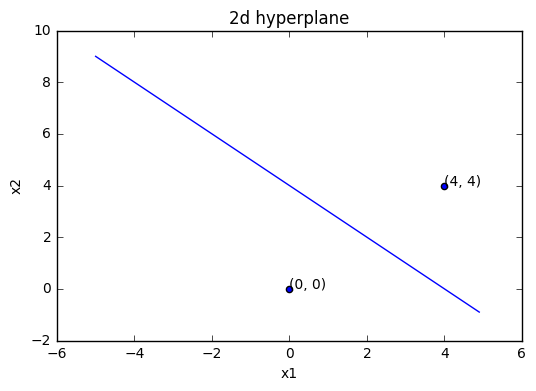

In [2]:
%matplotlib inline
drawHyperplane2d()

##  S.4 Decision Boundary

입력데이터를 분류하는 함수를 나타내면: 
* $ y=f(x_1,x_2,\ldots,x_n)=w_1 x_1+w_2x_2+\ldots,+w_nx_n +b$
* 이 함수를 벡터로 나타내면 $y=w \cdot x + b$이다.
* w는 1차원, x는 1차원 이상이다.
* x가 1차원이면 (x1,y)를 구분하는 선, (x1,x2),y를 구분하는 면, n차원이면 n-1차원의 hyperplane

* **y=0인 경우를 decision boundary**라고 한다.
    * $y=w \cdot x + b=0$ 함수로 구분해서, 한 쪽의 데이터는 클래스 1, 반대쪽은 -1이라고 분류하게 된다.
        * 1이라고 한 것은 정규화
    * 이 함수는 데이터를 구분하는 분류기를 말한다. hyperplane classifier라고 한다.
    * decison boundary는 수평이동할 수 있다.
        * 빼고 나누어도 w,b에 반영됨. 즉, $\lambda wx_i + \lambda b = 0$ 아래는 모두 같음.
            * $2x_i + x_2 - 4 = 0$ (i.e., $(2,1)*(x_1,x_2) - 4 = 0$)
            * $x_i + 0.5x_2 - 2 = 0$
            * $4x_i + 2x_2 - 8 = 0$

* **너비 margin를 최대화**하는 경계선
    * **support vectors**는 아래 위로 hyperplane을 움직였을 경우 만나는 데이터를 말한다. 
    * support vectors(hyperplane 상에 위치)간의 거리가 최대가 되도록.

* H: $wx_i + b = 0$ (hyperpance clasfifier, decision boundary, decision surface)
    * $H_1: wx_i + b \ge 0$이면 $y_i=1$
    * $H_2: wx_i + b \le 0$이면 $y_i=-1$
        * 표준화해서 $(x^+,1), (x^-,-1)$이라고 하면
            * $H_1: wx^+ + b = 1$
            * $H_2: wx^- + b = -1$
    * $y_i(wx_i + b) \ge 0\ \forall i$ (y는 1 또는 -1이므로 곱하면 부등호 방향 바뀜)
    * $H_1$ ~ $H_2$ 거리 h는
        $$
        \begin{aligned}
        \text{point(x0,y0) to a line Ax+By+c}\\
         d &= \frac{|Ax_0 + By_0 +c |}{\sqrt{A^2+B^2}}\\
         \text{distance from H1 ~ H2}\\
         h &=\frac{(wx^+ + b) - (wx^- + b)}{\|w\|}\\
           &=\frac{2}{\|w\|}\\
        \end{aligned}
        $$
    * maximum margin을 푸는 문제
    * w는 norm, 원점에서의 수직거리는 $\frac{b}{\|w\|}$

## 문제: 점에서 선으로의 수직 거리

점(5,6)에서 선 -2x + 3y + 4 =0으로의 수직 거리 d는 다음과 같이 계산한다.

$d = \frac{|Ax_0 + By_0 +c |}{\sqrt{A^2+B^2}}$

$ =\frac{|(-2)(5) + (3)(6) + 4 |}{\sqrt(4^2+9^2)}$


In [54]:
w=np.array([-2,3,4])
line=np.array([5,6,1])
numerator = np.dot(w,line)
denominator = np.linalg.norm(np.array([4,9]))
print numerator/denominator

1.21841539816


## 계산식

* 입력 (훈련데이터, label data)
* 출력 (alphas, weights, b) -> classifier를 구한다.
* 목적함수를 찾는다.
* 라그랑주로 변환한다.
    * primal form
    * 편미분으로 KKT를 구한다.
    * primal -> dual form
    * alpha를 구한다.
    * weights를 구한다.
    * b를 구한다.

### 표기

* m: n_samples n: n_features
* $\left \langle x,y \right\rangle$: inner product, K (similarity function n_samples x n_samples vector (Gramian matrix))
* X: $m \times n$ vectors
* y: class labels, $y_i \in \{-1,1\}$
* $x_i$ 학습데이터의 i번째 벡터
* $(x^{(i)},y^{(i)})$ 테스트데이터
* $\sum_i w_i y_i k(x_i,x_j)$ - weighted sum of similarities
* $\hat{y}$ predicted


* 학습데이터 ${x_i,y_i}\ where\ i=1 \ldots m$, $y_i \in y \{-1, +1\}, x_i \in \mathbb{R}^n$
  * 학습데이터 $ m \times n$벡터.
    행은 $1 \ldots m$,
    각 행은 $1 \ldots n$ 속성으로 구성 row (또는 column) vector ($\mathbb{R}^n$)
  * 클래스 y는 이진, -1 또는 1

|      | 속성1 | 속성2 | ... | 속성 n | 클래스 |
|------|------|------|------|------|-------|
|x1    |      |      |      |      |   1   |
|x2    |      |      |      |      |   1   |
|...   |      |      |      |      |   -1  |
|xm    |      |      |      |      |   1   |

### linear-separable (hard margin)

목적함수 max $\frac{2}{\|w\|}$ s.t. $y_i(wx_i + b)-1 \ge 0\ i=1,\cdots,n$
square root 계산을 쉽게 하기 위해 square하고, min문제로 바꾸면:
* min $\frac{\|w\|^2}{2}$
    * s.t. $y_i(w \cdot x_i + b) \ge 1$

* Primal form
    * 위 최적화 문제(constrained optimization problem)를 라그랑주 승수$\alpha$로 풀면:
    * $L_p=\frac{1}{2}\|w\|^2 - \sum_{i=1}^{n}{\alpha_i[y_i(w \cdot x_i + b)-1]}$
* 이를 w,b에 대해 편미분한 조건과 관련 조건으로 KKT (Karush-Kuhn-Tucker) 제한조건을 구하면 (5개):
    * KKT1
        * $\frac{\partial L}{\partial w} = w - \sum \alpha_i y_i x_i = 0$
        * $\frac{\partial L}{\partial b} = -\sum y_i \alpha_i = 0$
    * 목적함수에서 -> $y_i(wx_i + b)-1 \ge 0\ i=1,\cdots,n$ (목적함수에서)
    * KKT2 -> $\alpha_i \ge 0$
    * KKT3 -> $\alpha_i(y_i(wx_i + b)-1) = 0\ i=1,\cdots,n$
    * 3,4번째 고려하면 $\alpha_i \ge 0$인 경우 support vectors ($H_1, H_2$에 있는 값). 그 외 $\alpha_i=0$

* Dual form (Wolfe dual)
    * 라그랑주승수로 푼 편미분 결과를 $L_p$에 대입해서 풀면 -> w를 제거하게 됨.
  $$
    \begin{aligned}
    L_p &= \frac{1}{2}\|w\|^2 - \sum_{i=1}^{n}{\alpha_i[y_i(w \cdot x_i + b)-1]}\\
    \text{substitute w = $\sum \alpha y x$}\\
        &= \frac{1}{2}(\sum \alpha yx)^2 - \sum {\alpha [y (\sum \alpha y x x + b)-1]}\\
        &= \frac{1}{2}(\sum \alpha yx)^2 - \sum \sum \alpha\alpha y y x x + b \sum \alpha y + \sum \alpha\\
    \text{substitute $\sum \alpha y = 0$}\\
    L_d&=\sum_{i=1}^n \alpha_i
        -\frac12 \sum_{i=1}^n \sum_{j=1}^n y_i y_j K(x_i, x_j) \alpha_i \alpha_j\\
    \text{subject to:}\\
            \sum_{i=1}^n y_i \alpha_i &= 0\\
            \alpha_i                  &\ge 0\\
            for\ i=1, 2, \cdots, n
            \end{aligned}
        $$
* 이 최적화는 quadratic programmming, smo로 풀 수 있슴.

* **$L_d$**는 변수가 간단해짐. $\alpha$를 풀고난 후, 이미 알고 있는 데이터 x,y를 대입해서 해를 구함.
* 또 $\alpha$는 양수

### linear: non-separable (soft margin)

* margin에 noisy데이터가 포함되어서 slack변수 $\xi$ ($\ge 0$)
* soft-margin SVM
    * minimize $\frac{\|w\|^2}{2}$
    * subject to $y_i(w \cdot x_i + b) \ge 1 - \xi$ 그리고 $\xi \ge 0$ for $i=1,2,\cdots,n$
* Lp 위 식에서 제약조건 2개를 Lagrange multipliers로 풀면 ($\alpha_i, \mu_i \ge 0$)
    * $L_p=\frac{1}{2}\|w\|^2 + C\sum_{i=1}^n\xi
    -\sum_{i=1}^{n}{\alpha_i[y_i(w \cdot x_i + b)-1+\xi_i]
    -\sum_{i=1}^n\mu_i\xi_i}$
* Kuhn-Tucker conditions
    * $\frac{\partial L}{\partial w} = w - \sum \alpha_i y_i x_i = 0$
    * $\frac{\partial L}{\partial b} = -\sum y_i \alpha_i = 0$
    * $\frac{\partial L}{\partial \xi} = C - \alpha_i - \mu_i = 0$
    * $y_i(wx_i + b)-1+\xi \ge 0\ i=1,\cdots,n$ (목적함수에서)
    * $\alpha_i \ge 0$
    * $\xi_i \ge 0$
    * $\mu_i \ge 0$
    * $\alpha_i(y_i(wx_i + b)-1+\xi_i) = 0$
    * $\mu_i \xi_i = 0,\ i=1,\cdots,n$
    * 3,7번째 고려하면 $\alpha_i \le C$
* Ld 조건을 수정하면
    * $L_d=\sum_{i=1}^n \alpha_i
        -\frac12 \sum_{i=1}^n \sum_{j=1}^n y_i y_j K(x_i, x_j) \alpha_i \alpha_j$
    * s.t $\sum_{i=1}^n y_i \alpha_i = 0,
        0 \le \alpha_i \le C,\ for\ i=1, 2, \cdots, n$
* C is an SVM hyperparameter and K(xi, xj) is the kernel function, both supplied by the user
* 위 KT 8번째에서, $\xi_i=0$일 경우:
    * $b = \frac{1}{y_i} - \sum_{i=1}^n y_i \alpha_i K(x_i,x_j)$
* 위 KT 2,7,8조건에서:
    * $\alpha_i=0 \Rightarrow y_i(w \cdot x_i + b) \ge 1\ and\ \xi_i=0$ 
    * $0 < \alpha_i < 0 \Rightarrow y_i(w \cdot x_i + b) = 1\ and\ \xi_i=0$ 
    * $\alpha_i=C \Rightarrow y_i(w \cdot x_i + b) \le 1\ and\ \xi_i \ge 0$ 

## Kernel

### non-linear

* 비선형 속성을 mapping하여, 기존 kernel K<x,x>을 그대로 사용함.
* Kernel은 inner product (즉 데이터를 서로 곱하여 단일 값이 나옴)을 유지하지만, mapping한 값으로 교체함.
이를 kernel trick (또는 kernel substitution)이라고 함.

### kernel tricks
* linear
* gaussian rbf
* poly

### Gaussian radial bias function

* $K(x,x') = \exp\left(-\frac{||x - x'||^2}{2\sigma^2}\right)$

* $||x - x'||^2$ squared Euclidean distance between the two feature vectors
* $\sigma$ a free parameter.
    간단하게 나타내면 $K(x,x') = \exp(\gamma||x - x'||^2)$, $\gamma = -\frac{1}{2\sigma^2}$ 

## 벡터 product

* inner product: 결과가 scalar값 (벡터가 아님).
    * array([[a1*a2 + b1*b2, a1*c2 + b1*d2],[c1*a2 + d1*b2, c1*c2 + d1*d2])
* dot product: 1D일 경우 inner와 결과가 같음.
    * 1차원일 경우 inner product, 2차원은 transpose가 안됨
    * matrix일 경우, inner
* inner vs outer
    * $A^TA \ne AA^T$ (m,n)*(n,p) --> (m,p)이므로 대칭이 아닌 경우 결과 다름)
    * inner $A^TA$ <- a column vector multiplied by a row vector  -> scalar 값
    * outer $AA^T$ <- a row vector multiplied by a column vector -> 벡터 값

|     |  1d array   |   2d array   |   matrix   |
|-----|-------------|--------------|------------|
| *   | elementwise | element-wise | dot(inner) |
| dot | inner와 같음  |   inner와 다름 A.dot(AT)  | dot(inner) |

* 참고: brocacasting은 서로 다른 rank(n of dimensions)를 처리하는 방식을 말함.
    * rank는 number of dimensions
        * column vector는 rank 1
        * matrix는 항상 rank 2 (array는 1부터)
    * rank가 같은 경우는 문제가 없슴.
    * 서로 다른 rank인 경우는 연산할 경우, 큰 쪽으로 broadcasting
        * A(2,2) + b(1,1 scalar)인 경우, b가 (2,2)로 변환되어서 연산
        * A(2,3) + B(1,3)인 경우 오류. 그 이유는 B를 변환하면서 A의 최대인 3을 받아서 (3,3)으로 변경(broadcasting)해서 연산하면 오류.

In [2]:
import numpy as np
x1=np.array([[1,0],[3,1],[3,-1]])
print np.inner(x1,x1)
print np.dot(x1,x1.T)

[[ 1  3  3]
 [ 3 10  8]
 [ 3  8 10]]
[[ 1  3  3]
 [ 3 10  8]
 [ 3  8 10]]


In [3]:
import numpy as np
import sympy as sp
v0=np.array([0,1])
v1=np.array([2,3])
v2=np.array([4,5,6])

u0,u1,u2,u3,u4=sp.symbols('u:5')
u=np.array([u0,u1])

print "1.1 array vs matrix transpose multiplication"
v2mat=np.mat(v2)
print "array ATA=\n",v2.T*v2
print "array AAT=\n",v2*v2.T
print "matrix ATA=\n",v2mat.T*v2mat
print "matrix AAT=\n",v2mat*v2mat.T

1.1 array vs matrix transpose multiplication
array ATA=
[16 25 36]
array AAT=
[16 25 36]
matrix ATA=
[[16 20 24]
 [20 25 30]
 [24 30 36]]
matrix AAT=
[[77]]


In [4]:
# 1.2 np.multiply
print "matrix np.multiply(A,AT)=\n",np.multiply(v2mat,v2mat.T)

matrix np.multiply(A,AT)=
[[16 20 24]
 [20 25 30]
 [24 30 36]]


In [5]:
print "2. multiplication"
print "multiply=",np.multiply(v1,v0),np.multiply(v1,u)
print "dot=",np.dot(v1,v0),np.dot(v1,u)
print "inner product=",np.inner(v1,v0),np.dot(v1,u)
print "outer product=\n",np.outer(v1,v0),"\n",np.outer(v1,u)

2. multiplication
multiply= [0 3] [2*u0 3*u1]
dot= 3 2*u0 + 3*u1
inner product= 3 2*u0 + 3*u1
outer product=
[[0 2]
 [0 3]] 
[[2*u0 2*u1]
 [3*u0 3*u1]]


In [6]:
print "3. transpose"
print "transpse=",v2.T
print "forcing transpose\n"
v0.shape=(1,2)
print v0.T

3. transpose
transpse= [4 5 6]
forcing transpose

[[0]
 [1]]


### 계산

* kernel (m,n) (1,n) -> inner -> (m,1)
    * inner product로 계산

In [7]:
import numpy as np
print "4. kernel exercis 5x3 (n_samples x n_features)"
# x(m,n) xi(1,n) 곱하려면 np.inner(x.T,x)
x=np.array([[1,2,3],[4,5,6],[7,8,9],[0,1,2],[2,3,4]])
#print "x[0]={0}\nx[0].T={1}".format(x[0],x[0].T)
#print "x[0]*x[0].T={0}".format(x*x[0].T)
print "array inner product --> ",np.inner(x,x[0]) #(5,3)

4. kernel exercis 5x3 (n_samples x n_features)
array inner product -->  [14 32 50  8 20]


In [8]:
x2=np.mat(x)
print "matrix inner product --> ",np.inner(x2,x2[0]) #(5,3) (1,3)
print "msytic multiplication --> ",x2*x2[0].T
u=np.mat([u0,u1,u2])
print "x(m,n) * u.T (n,1) --> (m,1)\n",x2*u.T
print "--compare to matrix multiplication: ",np.dot(x,x[0].T)
print np.dot(x,u.T)

matrix inner product -->  [[14]
 [32]
 [50]
 [ 8]
 [20]]
msytic multiplication -->  [[14]
 [32]
 [50]
 [ 8]
 [20]]
x(m,n) * u.T (n,1) --> (m,1)
[[u0 + 2*u1 + 3*u2]
 [4*u0 + 5*u1 + 6*u2]
 [7*u0 + 8*u1 + 9*u2]
 [u1 + 2*u2]
 [2*u0 + 3*u1 + 4*u2]]
--compare to matrix multiplication:  [14 32 50  8 20]
[[u0 + 2*u1 + 3*u2]
 [4*u0 + 5*u1 + 6*u2]
 [7*u0 + 8*u1 + 9*u2]
 [u1 + 2*u2]
 [2*u0 + 3*u1 + 4*u2]]


## 라그랑주 승수법  Lagrange multiplier method

라그랑주 승수법은 제약을 가지고 있는 문제를 푸는 방법이다.

예를 들어, **f(x, y)를 최대화**하는 문제가 있고, **제약조건 g(x, y) = c**가 있다고 하자.
이 경우 **라그랑주 승수 $\lambda$**을 곱하여, 제약이 있는 문제를 제약이 없는 문제로 전환하여 풀 수 있다.

* $\Lambda(x,y,\lambda) = f(x,y) + \lambda \cdot \Big(g(x,y)-c\Big)$

## 문제: 최대화 문제를 라그랑주 승수법으로 풀기

출처ㅣ 위키피디아 Example 1 http://en.wikipedia.org/wiki/Lagrange_multiplier

x + y의 최대값을 구하는 문제,
제약조건은 $x^2 + y^2 = 1$이다.

* 최대화 f(x, y) = x + y
* 제약조건 $g(x,y) - c = x^2 + y^2 -1$

* 라그랑주 승수법으로 표현하면:

$\Lambda(x,y,\lambda) = f(x,y) + \lambda \cdot \Big(g(x,y)-c\Big)
    = x+y + \lambda (x^2 + y^2 - 1)\\$

* 편미분으로 gradient값을 구하면:

$\nabla_{x,y,\lambda} \Lambda(x , y, \lambda)=0$

$$
\begin{align}
    \frac{\partial \Lambda}{\partial x} &= 1 + 2 \lambda x = 0, \\
    \frac{\partial \Lambda}{\partial y} &= 1 + 2 \lambda y = 0, \\
    \frac{\partial \Lambda}{\partial \lambda} &= x^2 + y^2 - 1 = 0, 
\end{align}
$$

$$
\begin{align}
\nabla_{x,y} f &= - \lambda \nabla_{x,y} g \\ 
\nabla_{x,y} f &= \Big(\frac{\partial f}{\partial x},
    \frac{\partial f}{\partial y}\Big)\\
\nabla_{x,y} g &= \Big(\frac{\partial g}{\partial x},
    \frac{\partial g}{\partial y}\Big)\\
\end{align}
$$

* 앞의 식에서 $x = y = -\frac{1}{2\lambda}, \lambda \neq 0$
* 이를 마지막 식에 대입하면
$ 1/(4\lambda^2)+1/(4\lambda^2)=1, so \lambda = \mp 1/\sqrt{2}$
* 그러면 $(\sqrt{2}/2,\sqrt{2}/2) and (-\sqrt{2}/2,-\sqrt{2}/2)$
* 값을 구하면
    * $f(\sqrt{2}/2,\sqrt{2}/2)=\sqrt{2}$ and
    * $f(-\sqrt{2}/2,-\sqrt{2}/2)=-\sqrt{2}$
* 따라서
    * 최대값은 $\sqrt{2}$은 $(\sqrt{2}/2,\sqrt{2}/2)$에서
    * 최소값은 $-\sqrt{2}$은 $(-\sqrt{2}/2,-\sqrt{2}/2)$에서 얻어짐.

## 문제

* 한 점 p1(0,3)에서 $x^2 - y^2 =9$ 함수 f(x,y)위의 점 가운데 최소거리와 그 점을 구함.

라그랑주 승수를 이용한 풀이
* 함수f(x,y)위의 점을 p2(x,y)라고 하면, p1(0,3)에서 p2(x,y)거리 d는:
    * $d^2 = (x-0)^2 + (y-3)^2$
    * $\nabla f(x,y) = \lambda \nabla g(x,y)$를 충족하는 라그랑주 승수가 존재함
* 이를 라그랑주로 표현하면
    * minimize $d^2$, 즉 $f(x,y)=x^2 + (y-3)^2$
    * 제약조건 $g(x,y) = x^2 - y^2 -9 = 0$
풀이
* $\nabla f(x,y) = \frac{\partial f}{\partial x},\frac{\partial f}{\partial y}=(2x,2y-6)$
* $\nabla g(x,y) = \frac{\partial g}{\partial x},\frac{\partial g}{\partial y}=(2x,-2y)$
* 라그랑주 상수를 적용하면
    * $2x = \lambda 2x$, $2y-6=-\lambda 2y$
    * 이를 풀면 $\lambda=\frac{2x}{2x}=1$, 이를 다시 뒷 식에 대입하면 $y=6/4=3/2$
    * 이를 g(x,y)에 대입하면 $x^2=(3/2)^2+9=(9+36)/4=45/4$, 여기에서 x는 $\pm \frac{3\sqrt{5}}{2}$
    * 따라서 최소거리 $d^2=45/4 + (3/2 - 3)^2 = (45 + 9)/4$, 루트를 제거하면 $d=\frac{3\sqrt{6}}{2}$
    


In [38]:
# %load -r 624-640 src/pyds/svm.py
def testLagrange1():
    """
    one equality constraint (g=0)
    f=2-x**2-2*y**2
    g=x+y-1
    """
    import sympy as sp
    x,y,a=sp.symbols('x y a')
    f=2-x**2-2*y**2
    g=x+y-1 # g=0
    L=f-a*g
    Lx=L.diff(x)
    Ly=L.diff(y)
    La=L.diff(a)
    res=sp.solve([Lx,Ly,La])
    return res

res=testLagrange1()
print res

{x: 2/3, y: 1/3, a: -4/3}


## svm 풀어보기

* H를 구한다 $H_{ij} = y_i y_j x_i \cdot x_j$
* $\alpha$를 구한다 (smo 또는 Quadratic Programming).
    * max $\sum_{i=1}^m \alpha_i - \frac{1}{2} \alpha^T\alpha H$
    * s.t. $\alpha_i \ge 0\space and \sum_{i=1}^m \alpha_i y_i=0$
* w를 구한다 $w=\sum_{i=1}^m \alpha_i y_i x_i$
* support vectors를 구한다 ($\alpha_i \gt 0$을 충족하는 데이터 선별)
    * $\sum_{i=1}^n y_i \alpha_i = 0$를 충족하는 값은 sv. y는 1또는 -1인 경우 alpha가 0이면 그 합이 0
    * $y_s(wx_s + b) = 1 \forall s$
    * $y_s(\sum_{m \in S} \alpha_m y_m x_m \cdot x_s + b) = 1$
* b를 구한다.
    * $y_s^2 = 1$이므로 양변에 $y_s$를 곱해서 b를 구하면
    * $b = y_s - \sum_{m \in S} \alpha_m y_m x_m \cdot x_s$
    * 위는 개별적인 값, 전체 평균을 낸
        $b = \frac{1}{N_s} \sum_{s \in S} (y_s - \sum_{m \in S} \alpha_m y_m x_m \cdot x_s)$
* 테스트데이터 xi에 대해 predict함수를 구한다. 
    * $\hat{y} = sgn(w \cdot inX + b)$

$L_d$를 사용하여 풀면
* $\max_{\alpha} \sum_{i=1}^n \alpha_i - \frac12 \sum_{i=1}^n \sum_{j=1}^n y_i y_j K(x_i, x_j) \alpha_i \alpha_j$
* a1+a2 - 1/2 (y1y1K(x1,x1)a1a1 + y1y2K(x1,x2)a1a2 + y2y1K(x2,x1)a2a1 + y2y2K(x2,x2)a2a2)
* 이 식에서 최적해 a1,a2값을 구함.
* alphas가 많아지면 최적화 계산 복잡해짐.



## 문제: 간단한 SVM

다음과 같이 매우 단순한 데이터를 수식으로 전개해서 풀어보자.

x1 | x2 | y
-----|-----|-----
2 | 3 | 1
4 | 1 | -1

앞서 도출한 수식을 사용하여 다음 절차에 따라 풀어보자.
* 단계 1: Dual form으로 전개하기
* 단계 2: alpha를 구하기
* 단계 3: 제한조건으로 w구하기
* 단계 4: decision line을 이용해 b 구하기

### 데이터

symbolic programming을 사용하여, ```alpha```를 ```a0```,```a1```으로 선언한다.

In [1]:
import numpy as np
import sympy as sp

x=np.array([[2,3],[4,1]])
y=np.array([1,-1])

a0,a1=sp.symbols('a:2')
a=np.array([a0,a1])
b=sp.symbols('b')

### 단계 1: Dual form으로 전개하기

In [2]:
def KernelLinear(xi,xj):
    import numpy as np
    return np.inner(xi,xj)

K=KernelLinear(x,x)
print "Kernel={0}".format(K)

Kernel=[[13 11]
 [11 17]]


In [3]:
def getLd(a,y,x,xi):
    Ld1=sum(a) -0.5*sumaayyk(a,y,x,x)
    return Ld1

def sumaayyk(a,y,x,xi):
    import numpy as np
    _sumaayyk=np.array(sum(np.outer(a,a)*np.outer(y,y)*KernelLinear(x,xi)))
    return sum(_sumaayyk)

Ld1=sum(a) -0.5*sumaayyk(a,y,x,x)
print "Ld1={0}".format(Ld1)

Ld1=-6.5*a0**2 + 11.0*a0*a1 + a0 - 8.5*a1**2 + a1


### 단계 2: alpha를 구하기

* $\sum \alpha y = 0$ -> a0=a1
* Ld에 대입하고 -> 미분해서 -> 0으로 놓고 해를 구한다.

In [4]:
print "sum of ai*yi=0 --> ",sum(a*y)

sum of ai*yi=0 -->  a0 - a1


앞서 제약조건 ```a0=a1```을 충족해야 하므로, 계산한 Ld1에 a0에 a1을 대입하여 구해보자.

In [5]:
Ld1_=Ld1.subs(a0,a1)
print "Ld1_a0=a1 = ",Ld1_

Ld1_a0=a1 =  -4.0*a1**2 + 2*a1


* 미분해서 ```solve()```를 사용해 $\alpha$값을 구한다.

In [7]:
Ld2=sp.diff(Ld1_,a1)
print "Ld2={0}".format(Ld2)
a_=sp.solve(Ld2,a1)
a_1=a_[0]
print a_1

Ld2=-8.0*a1 + 2
0.250000000000000


* a0, a1를 저장한다.

In [9]:
sol_a=[a_1,a_1]
print sol_a

[0.250000000000000, 0.250000000000000]


* $w=\sum \alpha y x$에서 w를 구한다.

In [27]:
def sumayx(alphas,y,x):
    ayxT=alphas*y*x.T
    return ayxT.sum(axis=1)

print sumayx(a,y,x)
sol_w=sumayx(np.array(sol_a),y,x)
sumayx(np.array(sol_a),y,x)
print sol_w

[2*a0 - 4*a1 3*a0 - a1]
[-0.500000000000000 0.500000000000000]


* b의 값은 아래와 같이 구한다.
    $$
        \begin{aligned}
            \sum wx + b &=1\ or -1\\
            y(\sum wx + b) &=1\\
            yb &= 1- y\sum wx\\
            b & = y(1-y\sum wx)
        \end{aligned}
    $$

In [28]:
for xi,yi in zip(x,y):
    b=yi*(1-yi*np.inner(sol_w,xi))
    print b,xi,yi

0.500000000000000 [2 3] 1
0.500000000000000 [4 1] -1


* decision line을 구하면 
    * $w_0 \times x_0 + w_1 \times x_1 + b =0$
    * $ x_1= \frac{-(w_0 \times x_0 + b)}{w_1}$

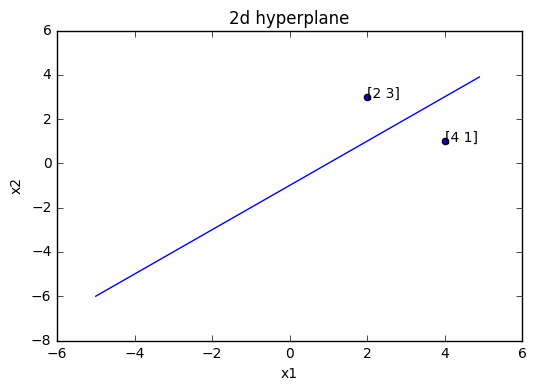

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

x1=np.arange(-5,5,0.1)
x2=-(sol_w[0]*x1+b)/sol_w[1]

fig=plt.figure()
ax = fig.add_subplot(111)
ax.set_title('2d hyperplane')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
for i in x:
    ax.text(i[0],i[1],i)
    plt.scatter(i[0],i[1])
plt.plot(x1,x2)
#plt.scatter([0,4],[0,4])
plt.show()


### sklearn

In [18]:
import numpy as np
import sklearn as sk

_xt=np.array([[2,3],[4,1]], dtype=float)
_yt=np.array([1,-1])

In [19]:
from sklearn import svm
clf=svm.SVC(kernel='linear', C = 1.0)
clf.fit(_xt,_yt)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
clf.coef_

array([[-0.5,  0.5]])

도움함수를 사용해서 그래프를 그려보자.

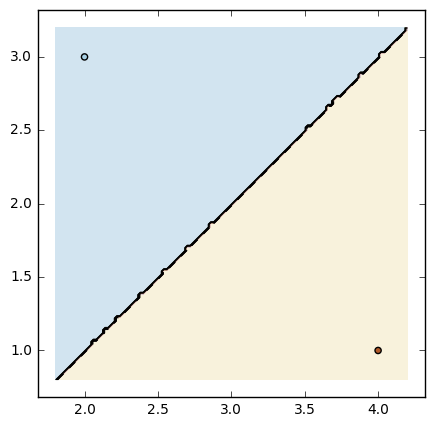

In [21]:
def plot_decision_boundary(clf, X, Y, cmap='Paired_r'):
    # Determine grid range in x and y directions
    h = 0.02
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    # Create grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(5,5))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=cmap, edgecolors='k');

plot_decision_boundary(clf,_xt,_yt)

In [1]:
import os
import sys 
os.environ["SPARK_HOME"]=os.path.join(os.environ['HOME'],'Downloads','spark-2.0.0-bin-hadoop2.7')
os.environ["PYLIB"]=os.path.join(os.environ["SPARK_HOME"],'python','lib')
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'py4j-0.10.1-src.zip'))
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'pyspark.zip'))

In [1]:
import pyspark
myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

## 문제 M-2: Kaggle Twitter US Airline Sentiment

* 원본 https://www.crowdflower.com/data-for-everyone/

* Google search - tweet sentiment corpus
    * http://help.sentiment140.com/home
    * http://thinknook.com/twitter-sentiment-analysis-training-corpus-dataset-2012-09-22/

* 압축을 풀면, 
     Tweets.csv와 database.sqlite 2 파일이 생성, 동일한 내용

* sqlite
```
$ sqlite3 data/kaggle/tweeterUSAirlineSentiment/database.sqlite 
SQLite version 3.11.0 2016-02-15 17:29:24
Enter ".help" for usage hints.
sqlite> .table
Tweets
```

* 14485 'negativereason_confidence' 제외한 건수

* ibm직원이 tweet을 변환해서 mlib한 거 https://github.com/castanan/w2v

구분 | 건수
-----|-----
데이터 행 | 14485
데이터 열 | 15 tweet_id, airline_sentiment, airline_sentiment_confidence, negativereason, negativereason_confidence, airline, airline_sentiment_gold, name, negativereason_gold, retweet_count, text, tweet_coord, tweet_created, tweet_location, user_timezone

1. 데이터 수집해서 dataframe.
* url, RT, punctuations, numbers, lowercase, emoticons
2. stop words
tokenize
tf-idf


### 데이터

#### sqlite 

이번에는 ```database.sqlite``` 파일을 읽어보자.
sqlite 데이터베이스를 사용하기 위해서는 bitbucket 사이트 https://bitbucket.org/xerial/sqlite-jdbc/ 에서 다운로드 받아서 저장한다.
sqlite.jar 파일을 ```spark-defaults.conf``` 맨 끝에 추가한다.

```python
spark.driver.extraClassPath /home/.../lib/sqlite-jdbc-3.14.2.jar
```

또는 아래와 같이 ```config()```를 설정한다. 이 때, 기존에 **이미 사용하고 있는 ```spark```가 있다면** **삭제하고 새로 열어야** 설정이 변경될 수 있다. 노트북에서는 kernel을 새로 시작하도록 한다.

In [1]:
import pyspark

spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config('spark.driver.extraClassPath','/home/jsl/Code/git/bb/jsl/pyds/lib/sqlite-jdbc-3.14.2.jar')\
    .getOrCreate()

In [2]:
_df=spark.read.format('jdbc')\
    .options(
        url="jdbc:sqlite:./data/kaggle/tweeterUSAirlineSentiment/database.sqlite",
        dbtable="Tweets",
        driver="org.sqlite.JDBC"
    ).load()

데이터 스키마를 출력해보자. 데이터타잎은 자동으로 인식되었지만, 그 가운데 ```airline_sentiment_confidence```, ```negativereason_confidence```는 자릿수가 크게 인식되었다. ```tweet_created```는 날짜이므로 필요한 경우 다시 인식을 하자.

In [3]:
_df.printSchema()

root
 |-- tweet_id: integer (nullable = false)
 |-- airline_sentiment: string (nullable = true)
 |-- airline_sentiment_confidence: decimal(38,18) (nullable = true)
 |-- negativereason: string (nullable = true)
 |-- negativereason_confidence: decimal(38,18) (nullable = true)
 |-- airline: string (nullable = true)
 |-- airline_sentiment_gold: string (nullable = true)
 |-- name: string (nullable = true)
 |-- negativereason_gold: string (nullable = true)
 |-- retweet_count: integer (nullable = true)
 |-- text: string (nullable = true)
 |-- tweet_coord: string (nullable = true)
 |-- tweet_created: string (nullable = true)
 |-- tweet_location: string (nullable = true)
 |-- user_timezone: string (nullable = true)



#### csv

트윗 ```csv``` 파일을 ```spark.read()``` 함수로 읽어보자.

In [3]:
tDf = spark.read.format('com.databricks.spark.csv')\
    .options(header='true', inferschema='true')\
    .load('data/kaggle/tweeterUSAirlineSentiment/Tweets.csv')

아래에서 볼 수 있듯이, 2번째 속성 **```airline_sentiment```**는 positive, neutral, negative로 구분되어 있다.
이 속성을 ```label```로 사용하게 된다.
11번째 **```text```**는 트윗 메시지를 말한다.

In [4]:
tDf.take(1)

[Row(tweet_id=u'570306133677760513', airline_sentiment=u'neutral', airline_sentiment_confidence=u'1.0', negativereason=None, negativereason_confidence=None, airline=u'Virgin America', airline_sentiment_gold=None, name=u'cairdin', negativereason_gold=None, retweet_count=0, text=u'@VirginAmerica What @dhepburn said.', tweet_coord=None, tweet_created=u'2015-02-24 11:35:52 -0800', tweet_location=None, user_timezone=u'Eastern Time (US & Canada)')]

In [5]:
tDf.printSchema()

root
 |-- tweet_id: string (nullable = true)
 |-- airline_sentiment: string (nullable = true)
 |-- airline_sentiment_confidence: string (nullable = true)
 |-- negativereason: string (nullable = true)
 |-- negativereason_confidence: string (nullable = true)
 |-- airline: string (nullable = true)
 |-- airline_sentiment_gold: string (nullable = true)
 |-- name: string (nullable = true)
 |-- negativereason_gold: string (nullable = true)
 |-- retweet_count: integer (nullable = true)
 |-- text: string (nullable = true)
 |-- tweet_coord: string (nullable = true)
 |-- tweet_created: string (nullable = true)
 |-- tweet_location: string (nullable = true)
 |-- user_timezone: string (nullable = true)



데이터 개수를 세어보면 14650개 이다.

In [6]:
tDf.select('negativereason_confidence').count()

14837

```airline_sentiment```,```text``` 등 일부 속성을 선택하여 출력해보자.

In [7]:
tDf.select('airline_sentiment', 'text', 'airline_sentiment_confidence',\
          'negativereason_confidence').show(10)

+-----------------+--------------------+----------------------------+-------------------------+
|airline_sentiment|                text|airline_sentiment_confidence|negativereason_confidence|
+-----------------+--------------------+----------------------------+-------------------------+
|          neutral|@VirginAmerica Wh...|                         1.0|                     null|
|         positive|@VirginAmerica pl...|                      0.3486|                      0.0|
|          neutral|@VirginAmerica I ...|                      0.6837|                     null|
|         negative|"@VirginAmerica i...|                         1.0|                   0.7033|
|         negative|@VirginAmerica an...|                         1.0|                      1.0|
|         negative|@VirginAmerica se...|                         1.0|                   0.6842|
|             null|                null|        2015-02-24 11:14:...|     Pacific Time (US ...|
|         positive|@VirginAmerica ye...|

### 데이터 탐색

긍정, 중립, 부정으로 구분한 ```airline_sentiment```을 읽어 보자.
```sqlite```와 ```csv```의 내용에 차이가 있다.
```csv``` 파일에 오류가 있는 것으로 보인다.

In [8]:
print tDf.groupBy('airline_sentiment').count().show()

+--------------------+-----+
|   airline_sentiment|count|
+--------------------+-----+
|[35.23185283, -80...|    1|
|   ubetter do smth!"|    1|
|            positive| 2363|
| we had a good ru...|    1|
| never submits. F...|    1|
|[40.7740308, -73....|    1|
|                   0|    8|
|     please????????"|    1|
|                null|  155|
| this is where Ce...|    1|
| flight AA1469 2/...|    1|
|[51.44284934, -0....|    1|
| or just days tha...|    1|
|[40.65062011, -73...|    1|
|             neutral| 3099|
| this is where Ce...|    2|
|            negative| 9178|
| and I might choo...|    1|
|            Virginia|    1|
|          [0.0, 0.0]|    1|
+--------------------+-----+
only showing top 20 rows

None


```_df``` 데이터로 확인해 보자. 다음에서 보듯이 긍정, 중립, 부정으로 구분이 되어있다.

In [9]:
print _df.groupBy('airline_sentiment').count().show()

+-----------------+-----+
|airline_sentiment|count|
+-----------------+-----+
|         positive| 2334|
|          neutral| 3069|
|         negative| 9082|
+-----------------+-----+

None


In [10]:
print _df.groupBy('airline')\
    .agg({'airline_sentiment': 'count'}).show()

+--------------+------------------------+
|       airline|count(airline_sentiment)|
+--------------+------------------------+
|         Delta|                    2222|
|Virgin America|                     504|
|        United|                    3822|
|    US Airways|                    2913|
|     Southwest|                    2420|
|      American|                    2604|
+--------------+------------------------+

None


긍정, 중립, 부정으로 구분한 개수와 비율을 계산해서 출력해보자.
```_df.count()``` 함수로 전체 개수를 구할 수 있다.
비율은 전체로 나누어 주면 계산된다.
문제는 계산식 'count/total'이 문자열이고 문자열은 계산이 가능하지 못하다는 점이다.
이 때 **```expr()```** 함수를 사용하면, 이 **문자열을 실행**해서 컬럼에 입력하게 된다.

In [11]:
import pyspark.sql.functions as F

total=_df.count()
sDf=(_df.groupBy('airline_sentiment').count()
    .withColumn('total',F.lit(total))
    .withColumn('ratio',F.expr('count/total')))
sDf.show()

+-----------------+-----+-----+-------------------+
|airline_sentiment|count|total|              ratio|
+-----------------+-----+-----+-------------------+
|         positive| 2334|14485| 0.1611322057300656|
|          neutral| 3069|14485|0.21187435277873662|
|         negative| 9082|14485| 0.6269934414911978|
+-----------------+-----+-----+-------------------+



Spark는 그래프를 지원하지 않아, 라이브러리인 matplotlib을 사용하면 된다.
그러기 위해서는 그래프에 입력하는 데이터를, 예를 들면 List로 생성해서 사용해야 한다.
또는 pandas로 변환해서 그래프를 그릴 수 있다.

In [12]:
pdf=sDf.toPandas()
pdf.head()

,airline_sentiment,count,total,ratio
0,positive,2334,14485,0.161132
1,neutral,3069,14485,0.211874
2,negative,9082,14485,0.626993


ratio 컬럼으로 파이차트를 그려보자.
**```y```**는 label을 출력한다.
**```kind```**는 ‘bar’,’barh’,’pie’,’scatter’,’kde'를 선택할 수 있다.
**```labels```**는 행이름을 직접 사용할 수 없어서, 명칭을 그냥 입력하였다.
**```legend```**를 표시하고 싶으면 0, 1 값을 넣어준다.


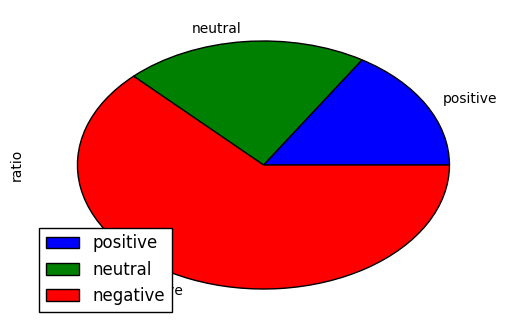

In [13]:
%matplotlib inline
pdf.ratio.plot(y='% of sentiment', kind='pie', legend=1, labels=['positive','neutral','negative'])

항공사별 긍정, 중립, 부정을 crosstab으로 분석해보자.

In [14]:
#_tDf.cube("airline", _tDf.airline_sentiment).count()\
#    .orderBy("airline", "airline_sentiment").show()
_df.stat.crosstab("airline","airline_sentiment").show()

+-------------------------+--------+-------+--------+
|airline_airline_sentiment|negative|neutral|positive|
+-------------------------+--------+-------+--------+
|                    Delta|     955|    723|     544|
|           Virgin America|     181|    171|     152|
|               US Airways|    2263|    381|     269|
|                   United|    2633|    697|     492|
|                 American|    1864|    433|     307|
|                Southwest|    1186|    664|     570|
+-------------------------+--------+-------+--------+



부정적인 의견을 구분해보자.

In [15]:
_df.groupBy('negativereason').count().show(truncate=False)

+---------------------------+-----+
|negativereason             |count|
+---------------------------+-----+
|Lost Luggage               |719  |
|longlines                  |177  |
|Late Flight                |1650 |
|Damaged Luggage            |73   |
|Cancelled Flight           |829  |
|Customer Service Issue     |2885 |
|Flight Attendant Complaints|475  |
|                           |5403 |
|Bad Flight                 |575  |
|Can't Tell                 |1176 |
|Flight Booking Problems    |523  |
+---------------------------+-----+



* 'tweet_location', 'retweet_count' 분석 - 비율, 지도위에??

### 형변환

confidence 관련 속성은 'string'으로 자동인식되어 연산이 가능하지 못하기 때문에 ```double```로 형변환을 해준다.



In [17]:
from pyspark.sql.types import IntegerType, DateType, DoubleType, DecimalType, FloatType

앞서 생성해 sqlite 데이터로부터 생성한 DataFrame의 형을 변경해 보자.

In [16]:
_tDf=_df.withColumn("airline_sentiment_confidenceD",\
                    _df['airline_sentiment_confidence']\
                   .cast("double")).drop('airline_sentiment_confidence')

In [17]:
_tDf=_tDf.withColumn("negativereason_confidenceD",\
                     _tDf['negativereason_confidence']\
                   .cast("double")).drop('negativereason_confidence')

DateType()은 년월일 형식을 지원 "0001-01-01" through "9999-12-31".

In [18]:
from pyspark.sql.types import DateType
_tDf=_tDf.withColumn('tweet_createdDate', _tDf['tweet_created']\
                     .cast(DateType())).drop('tweet_created')
#_tDf=_tDf.withColumn('retweet_countI', _tDf['retweet_count']\
#                     .cast("integer")).drop('retweet_count')

In [19]:
_tDf.printSchema()

root
 |-- tweet_id: integer (nullable = false)
 |-- airline_sentiment: string (nullable = true)
 |-- negativereason: string (nullable = true)
 |-- airline: string (nullable = true)
 |-- airline_sentiment_gold: string (nullable = true)
 |-- name: string (nullable = true)
 |-- negativereason_gold: string (nullable = true)
 |-- retweet_count: integer (nullable = true)
 |-- text: string (nullable = true)
 |-- tweet_coord: string (nullable = true)
 |-- tweet_location: string (nullable = true)
 |-- user_timezone: string (nullable = true)
 |-- airline_sentiment_confidenceD: double (nullable = true)
 |-- negativereason_confidenceD: double (nullable = true)
 |-- tweet_createdDate: date (nullable = true)



sqlite를 사용하면 BigDecimal오류가 'java.sql.SQLException: Bad value for type BigDecimal'
    * null 값이 많다.

변수명 | 값 | null
-----|-----|-----
airline_sentiment_confidence | 1~0의 값, 소수점 18자리까지 | null 값이 거의 없다.
negativereason_confidence | 상동 | null 값이 많다.

In [20]:
_tDf=_tDf.drop('negativereason_confidenceD')

In [21]:
from pyspark.sql.functions import count
_tDf.agg(*[count(c).alias(c) for c in _tDf.columns]).show()

+--------+-----------------+--------------+-------+----------------------+-----+-------------------+-------------+-----+-----------+--------------+-------------+-----------------------------+-----------------+
|tweet_id|airline_sentiment|negativereason|airline|airline_sentiment_gold| name|negativereason_gold|retweet_count| text|tweet_coord|tweet_location|user_timezone|airline_sentiment_confidenceD|tweet_createdDate|
+--------+-----------------+--------------+-------+----------------------+-----+-------------------+-------------+-----+-----------+--------------+-------------+-----------------------------+-----------------+
|   14485|            14485|         14485|  14485|                 14485|14485|              14485|        14485|14485|      14485|         14485|        14485|                        14485|            14485|
+--------+-----------------+--------------+-------+----------------------+-----+-------------------+-------------+-----+-----------+--------------+-------------

### 텍스트 가려내기

트윗 메시지에는 불필요하거나 의미없는 텍스트가 섞여 있다.

패턴 | 설명
-----|-----
@[\w]+ | @로 시작하는 alphanumerics
[^\w] | alphanumeric이 아닌 한 글자, apostrophe, dot, etc.
\w+:\/\/\S+ | ://를 가지고 있는 url

In [23]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
import re

def myFilter(s):
    return ' '.join(re.sub("(@[\w]+)|([^\w])|(\w+:\/\/\S+)"," ",s).split())

myUdf = udf(myFilter, StringType())
filterDF = _tDf.withColumn("textFiltered", myUdf(_tDf['text']))

### 단어 분리


In [24]:
from pyspark.ml.feature import *

re = RegexTokenizer(inputCol="textFiltered", outputCol="words", pattern="\\W")
wordsDf=re.transform(filterDF)

In [25]:
wordsDf.select('text','words').take(3)

[Row(text=u"@JetBlue's new CEO seeks the right balance to please passengers and Wall ... - Greenfield Daily Reporter http://t.co/LM3opxkxch", words=[u's', u'new', u'ceo', u'seeks', u'the', u'right', u'balance', u'to', u'please', u'passengers', u'and', u'wall', u'greenfield', u'daily', u'reporter']),
 Row(text=u'@JetBlue is REALLY getting on my nerves !! \U0001f621\U0001f621 #nothappy', words=[u'is', u'really', u'getting', u'on', u'my', u'nerves', u'nothappy']),
 Row(text=u'@united yes. We waited in line for almost an hour to do so. Some passengers just left not wanting to wait past 1am.', words=[u'yes', u'we', u'waited', u'in', u'line', u'for', u'almost', u'an', u'hour', u'to', u'do', u'so', u'some', u'passengers', u'just', u'left', u'not', u'wanting', u'to', u'wait', u'past', u'1am'])]

### 불용어

In [26]:
from pyspark.ml.feature import StopWordsRemover
stop = StopWordsRemover(inputCol="words", outputCol="nostops")

In [27]:
stopwords=list()

_stopwords=stop.getStopWords()
for e in _stopwords:
    stopwords.append(e)
_mystopwords=[u"나",u"너", u"우리"]

In [28]:
for e in _mystopwords:
    stopwords.append(e)
print stopwords

[u'i', u'me', u'my', u'myself', u'we', u'our', u'ours', u'ourselves', u'you', u'your', u'yours', u'yourself', u'yourselves', u'he', u'him', u'his', u'himself', u'she', u'her', u'hers', u'herself', u'it', u'its', u'itself', u'they', u'them', u'their', u'theirs', u'themselves', u'what', u'which', u'who', u'whom', u'this', u'that', u'these', u'those', u'am', u'is', u'are', u'was', u'were', u'be', u'been', u'being', u'have', u'has', u'had', u'having', u'do', u'does', u'did', u'doing', u'a', u'an', u'the', u'and', u'but', u'if', u'or', u'because', u'as', u'until', u'while', u'of', u'at', u'by', u'for', u'with', u'about', u'against', u'between', u'into', u'through', u'during', u'before', u'after', u'above', u'below', u'to', u'from', u'up', u'down', u'in', u'out', u'on', u'off', u'over', u'under', u'again', u'further', u'then', u'once', u'here', u'there', u'when', u'where', u'why', u'how', u'all', u'any', u'both', u'each', u'few', u'more', u'most', u'other', u'some', u'such', u'no', u'nor', u

In [29]:
stopDf=stop.transform(wordsDf)
stopDf.select('text','nostops').show()

+--------------------+--------------------+
|                text|             nostops|
+--------------------+--------------------+
|@JetBlue's new CE...|[new, ceo, seeks,...|
|@JetBlue is REALL...|[really, getting,...|
|@united yes. We w...|[yes, waited, lin...|
|@united the we go...|[got, gate, iah, ...|
|@SouthwestAir its...|[cool, bags, take...|
|@united and don't...|[hope, nicer, fli...|
|@united I like de...|[like, delays, le...|
|@united, link to ...|[link, current, s...|
|@SouthwestAir you...|[guys, hour, 2, p...|
|@united I tried 2...|[tried, 2, dm, go...|
|Wanted to get my ...|[wanted, get, bag...|
|@united please se...|[please, see, fli...|
|@united still wai...|[still, waiting, ...|
|@united even thou...|[even, though, te...|
|@USAirways how's ...|[us, 1797, lookin...|
|@SouthwestAir nic...|[nice, work, update]|
|@united i have it...|[items, sentiment...|
|@SouthwestAir We ...|[stuck, sju, seve...|
|@JetBlue CEO weig...|[ceo, weighs, pro...|
|@USAirways @Ameri...|[r, u, sup

## word cloud

from wordcloud import WordCloud, STOPWORDS

wordsToCloud=stopDf.select('nostops').collect()


wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(wordsToCloud)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### 단어빈도

In [30]:
from pyspark.ml.feature import CountVectorizer
cv = CountVectorizer(inputCol="words", outputCol="cv", vocabSize=30,minDF=1.0)
cvModel = cv.fit(wordsDf)
cvDf = cvModel.transform(wordsDf)

In [31]:
cvDf.select('airline_sentiment', 'text','words','cv').show()

+-----------------+--------------------+--------------------+--------------------+
|airline_sentiment|                text|               words|                  cv|
+-----------------+--------------------+--------------------+--------------------+
|          neutral|@JetBlue's new CE...|[s, new, ceo, see...|(30,[0,2,8,22],[1...|
|         negative|@JetBlue is REALL...|[is, really, gett...|(30,[7,9,10],[1.0...|
|         negative|@united yes. We w...|[yes, we, waited,...|(30,[0,5,11,21,28...|
|         negative|@united the we go...|[the, we, got, in...|(30,[0,2,4,6,7,8,...|
|         negative|@SouthwestAir its...|[its, cool, that,...|(30,[2,3,7,9,12,1...|
|         negative|@united and don't...|[and, don, t, hop...|(30,[0,3,4,5,6,8,...|
|         negative|@united I like de...|[i, like, delays,...|(30,[1,2,3,4,7,15...|
|         negative|@united, link to ...|[link, to, curren...|(30,[0,13,14,18,2...|
|         negative|@SouthwestAir you...|[you, guys, there...|(30,[4,7,14,24,28...|
|   

### label, features

Using StringIndexer with setHandleInvalid("skip") option
2017년 7월 발표된 Spark 2.2부터 ```.setHandleInvalid("keep")```
- ```skip``` 새로운 label은 무시


```todel
cvDf_negPos=cvDf.filter(cvDf.airline_sentiment != 'neutral')
```

In [32]:
from pyspark.ml.feature import StringIndexer
labelIndexer = StringIndexer(inputCol='airline_sentiment', outputCol="label").setHandleInvalid("skip")
model=labelIndexer.fit(cvDf)

In [33]:
siDf=model.transform(cvDf)

todel
```
from pyspark.ml.feature import StringIndexer
labelIndexer = StringIndexer(inputCol='airline_sentiment', outputCol="label").setHandleInvalid("skip")
model=labelIndexer.fit(cvDf_negPos)

siDf=model.transform(cvDf_negPos)
```

컬럼명을 변경해보자. ```alias()``` 또는 ```withColumnRenamed()``` 함수 모두 같은 기능을 한다.

In [34]:
siDf.select("cv").alias("features")

DataFrame[cv: vector]

In [35]:
siDf=siDf.withColumnRenamed("cv", "features")

In [37]:
siDf.printSchema()

root
 |-- tweet_id: integer (nullable = false)
 |-- airline_sentiment: string (nullable = true)
 |-- negativereason: string (nullable = true)
 |-- airline: string (nullable = true)
 |-- airline_sentiment_gold: string (nullable = true)
 |-- name: string (nullable = true)
 |-- negativereason_gold: string (nullable = true)
 |-- retweet_count: integer (nullable = true)
 |-- text: string (nullable = true)
 |-- tweet_coord: string (nullable = true)
 |-- tweet_location: string (nullable = true)
 |-- user_timezone: string (nullable = true)
 |-- airline_sentiment_confidenceD: double (nullable = true)
 |-- tweet_createdDate: date (nullable = true)
 |-- textFiltered: string (nullable = true)
 |-- words: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- features: vector (nullable = true)
 |-- label: double (nullable = true)



```airline_sentiment```이 ```label```로 올바르게 변환되었는지 확인해보자.

In [41]:
siDf.select('airline_sentiment','label').show()

+-----------------+-----+
|airline_sentiment|label|
+-----------------+-----+
|          neutral|  1.0|
|         negative|  0.0|
|         negative|  0.0|
|         negative|  0.0|
|         negative|  0.0|
|         negative|  0.0|
|         negative|  0.0|
|         negative|  0.0|
|         negative|  0.0|
|         negative|  0.0|
|         negative|  0.0|
|         negative|  0.0|
|         negative|  0.0|
|          neutral|  1.0|
|          neutral|  1.0|
|         positive|  2.0|
|         negative|  0.0|
|         negative|  0.0|
|          neutral|  1.0|
|         negative|  0.0|
+-----------------+-----+
only showing top 20 rows



### train, test

```randomSplit(weights, seed)``` 함수에 입력하는 ```weights```는 훈련, 테스트 비율을 설정하는데 합쳐서 1.0이 되어야 하고, 그렇지 않으면 알아서 정규화를 해서 맞추어 준다. seed는 선택적으로 설정하며 표본을 추출하는 seed를 말한다.

In [38]:
train, test = siDf.randomSplit([0.6,0.4])

In [39]:
train.count()

8756

In [40]:
test.count()

5729

### svm 이진분류

Linear SVM Classifier

SVMs은 이진분류 binary classification만 가능하다. 반면 logistic regression은 이진, 다중 multiclass classification에 적용된다.
따라서 중립 (1.0)을 제외하고 긍정 (2.0), 부정 (0.0)만 남겨놓도록 한다.
```filter()```는 ```where()```와 같은 역할을 하는 명령어이다.

#### label 재설정

```StringIndexer```로 충분히 되어야 하지만 **multiclass 오류**가 발생한다. Spark 내부 오류로 판단되어, **```Binarizer```**로 이진 클래스로 강제로 분류하여 SVM 모델을 생성하기로 한다.

In [42]:
from pyspark.ml.feature import Binarizer
binarizer = Binarizer(threshold=0.0, inputCol="label", outputCol="label2")
siDf = binarizer.transform(siDf)
siDf.select('label','label2').show(10)

+-----+------+
|label|label2|
+-----+------+
|  1.0|   1.0|
|  0.0|   0.0|
|  0.0|   0.0|
|  0.0|   0.0|
|  0.0|   0.0|
|  0.0|   0.0|
|  0.0|   0.0|
|  0.0|   0.0|
|  0.0|   0.0|
|  0.0|   0.0|
+-----+------+
only showing top 10 rows



#### 데이터 선별

svm은 이진분류만 가능하므로, 2가지 label만 분리한다.

In [68]:
siDf_negPos=siDf.filter((siDf.label == 0.0 ) | (siDf.label== 2.0))

#### train, test

이진분류 데이터를 훈련, 테스트로 분리하자.

In [69]:
train_negPos, test_negPos = siDf_negPos.randomSplit([0.6,0.4])

In [70]:
train_negPos.printSchema()

root
 |-- tweet_id: integer (nullable = false)
 |-- airline_sentiment: string (nullable = true)
 |-- negativereason: string (nullable = true)
 |-- airline: string (nullable = true)
 |-- airline_sentiment_gold: string (nullable = true)
 |-- name: string (nullable = true)
 |-- negativereason_gold: string (nullable = true)
 |-- retweet_count: integer (nullable = true)
 |-- text: string (nullable = true)
 |-- tweet_coord: string (nullable = true)
 |-- tweet_location: string (nullable = true)
 |-- user_timezone: string (nullable = true)
 |-- airline_sentiment_confidenceD: double (nullable = true)
 |-- tweet_createdDate: date (nullable = true)
 |-- textFiltered: string (nullable = true)
 |-- words: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- features: vector (nullable = true)
 |-- label: double (nullable = true)
 |-- label2: double (nullable = true)



전체 갯수와 분리되 데이터의 갯수를 세어보자. ```StringIndexer()```에서 산출한 ```label```, ```Binarizer()```에서 산출한 ```label2``` 모두 갯수가 동일하다. 그럼에도 불구하고 label은 multiclass라는 오류가 발생한다. 혹시 소숫점 자릿수가 서로 다를 가능성도 있다. 

In [71]:
train_negPos.count()

6843

In [72]:
train_negPos.groupBy('label').count().show()

+-----+-----+
|label|count|
+-----+-----+
|  0.0| 5464|
|  2.0| 1379|
+-----+-----+



In [74]:
train_negPos.groupBy('label2').count().show()

+------+-----+
|label2|count|
+------+-----+
|   0.0| 5464|
|   1.0| 1379|
+------+-----+



test_negPos=test.filter(test.label != 2.0)

In [75]:
test_negPos.count()

4573

In [76]:
test_negPos.groupBy('label').count().show()

+-----+-----+
|label|count|
+-----+-----+
|  0.0| 3618|
|  2.0|  955|
+-----+-----+



이진분류를 위한 label 값과 features를 산출하였다. 데이터를 일부 출력해서 오류가 있는지 확인해보자.

In [77]:
test_negPos.select('airline_sentiment','label','label2','features').show(30)

+-----------------+-----+------+--------------------+
|airline_sentiment|label|label2|            features|
+-----------------+-----+------+--------------------+
|         negative|  0.0|   0.0|(30,[0,1,4,6,8,9,...|
|         negative|  0.0|   0.0|(30,[7,8,14],[1.0...|
|         negative|  0.0|   0.0|(30,[0,2,4,8,9,10...|
|         negative|  0.0|   0.0|(30,[1,2,9],[2.0,...|
|         negative|  0.0|   0.0|(30,[1,2,3,4,9,12...|
|         negative|  0.0|   0.0|(30,[0,1,2,3,6,8,...|
|         negative|  0.0|   0.0|(30,[0,6],[1.0,1.0])|
|         negative|  0.0|   0.0|(30,[11,21],[1.0,...|
|         negative|  0.0|   0.0|(30,[0,2,4,11,19]...|
|         positive|  2.0|   1.0|(30,[2,3,7,8,10,2...|
|         negative|  0.0|   0.0|(30,[0,5,9,10,21,...|
|         negative|  0.0|   0.0|(30,[0,1,3,4,15,1...|
|         negative|  0.0|   0.0|(30,[3,5,12,20,21...|
|         positive|  2.0|   1.0|(30,[2,5,8,20,24]...|
|         negative|  0.0|   0.0|(30,[0,3,6,15,21,...|
|         negative|  0.0|   

```LinearSVC()``` 함수는 svm모델 ```LinearSVCModel``` 객체를 만들고, 이 모델에 ```fit(입력데이터)```하여 모델이 입력데이터에 얼마나 잘 맞는지 볼 수 있다.

In [78]:
from pyspark.ml.classification import LinearSVC
svm = LinearSVC(maxIter=5, regParam=0.01, labelCol='label2', featuresCol='features')
#svm = LinearSVC(maxIter=5, regParam=0.01)

위에서 만들어진 모델은 ```pyspark.ml.classification.LinearSVCModel```을 말한다.
```write().save(path)``` 함수는 모델을 저장하여 다음 세션에 적용할 경우 사용한다.
예측에 사용할 경우 ```transform()``` 함수에 데이터를 넣어주면 된다.

In [79]:
model = svm.fit(train_negPos)

In [80]:
model.coefficients

DenseVector([-0.1534, -0.1186, -0.0526, -0.121, -0.0044, -0.0333, -0.2153, -0.2352, -0.1449, -0.1603, -0.315, -0.1464, -0.0599, -0.3148, -0.187, -0.0959, -0.2421, -0.1581, -0.2057, -0.2092, -0.0621, -0.3462, -0.085, -0.1284, -0.1997, -0.4196, -0.1606, -0.1407, -0.1773, -0.1836])

In [81]:
model.intercept

-0.2421599222008503

In [82]:
model.numClasses

2

In [83]:
model.numFeatures

30

### predict

transforms the input dataset with optional parameters.
```transform()``` 함수는 ```prediction```, ```rawPrediction``` 2 컬럼을 만들어 준다.
 또는 ```transform()``` 함수로 예측 값을 계산할 수 있다.

In [84]:
model.transform(test_negPos).head()

Row(tweet_id=-2146156544, airline_sentiment=u'negative', negativereason=u'Lost Luggage', airline=u'US Airways', airline_sentiment_gold=u'', name=u'scheds14', negativereason_gold=u'', retweet_count=0, text=u"@USAirways I didn't Cancelled Flight my flight, you did. Than you loved me to another flight and forgot my bags", tweet_coord=u'', tweet_location=u'Phoenix, AZ', user_timezone=u'', airline_sentiment_confidenceD=1.0, tweet_createdDate=datetime.date(2015, 2, 18), textFiltered=u'I didn t Cancelled Flight my flight you did Than you loved me to another flight and forgot my bags', words=[u'i', u'didn', u't', u'cancelled', u'flight', u'my', u'flight', u'you', u'did', u'than', u'you', u'loved', u'me', u'to', u'another', u'flight', u'and', u'forgot', u'my', u'bags'], features=SparseVector(30, {0: 1.0, 1: 1.0, 4: 2.0, 6: 3.0, 8: 1.0, 9: 2.0, 13: 1.0, 15: 1.0}), label=0.0, label2=0.0, rawPrediction=DenseVector([2.0452, -2.0452]), prediction=0.0)

In [85]:
model.transform(test_negPos).take(2)

[Row(tweet_id=-2146156544, airline_sentiment=u'negative', negativereason=u'Lost Luggage', airline=u'US Airways', airline_sentiment_gold=u'', name=u'scheds14', negativereason_gold=u'', retweet_count=0, text=u"@USAirways I didn't Cancelled Flight my flight, you did. Than you loved me to another flight and forgot my bags", tweet_coord=u'', tweet_location=u'Phoenix, AZ', user_timezone=u'', airline_sentiment_confidenceD=1.0, tweet_createdDate=datetime.date(2015, 2, 18), textFiltered=u'I didn t Cancelled Flight my flight you did Than you loved me to another flight and forgot my bags', words=[u'i', u'didn', u't', u'cancelled', u'flight', u'my', u'flight', u'you', u'did', u'than', u'you', u'loved', u'me', u'to', u'another', u'flight', u'and', u'forgot', u'my', u'bags'], features=SparseVector(30, {0: 1.0, 1: 1.0, 4: 2.0, 6: 3.0, 8: 1.0, 9: 2.0, 13: 1.0, 15: 1.0}), label=0.0, label2=0.0, rawPrediction=DenseVector([2.0452, -2.0452]), prediction=0.0),
 Row(tweet_id=-2145992704, airline_sentiment=u

In [86]:
result=model.transform(test_negPos)

In [88]:
model.transform(test_negPos).select('label','label2','prediction').show(100)

+-----+------+----------+
|label|label2|prediction|
+-----+------+----------+
|  0.0|   0.0|       0.0|
|  0.0|   0.0|       0.0|
|  0.0|   0.0|       0.0|
|  0.0|   0.0|       0.0|
|  0.0|   0.0|       0.0|
|  0.0|   0.0|       0.0|
|  0.0|   0.0|       0.0|
|  0.0|   0.0|       0.0|
|  0.0|   0.0|       0.0|
|  2.0|   1.0|       0.0|
|  0.0|   0.0|       0.0|
|  0.0|   0.0|       0.0|
|  0.0|   0.0|       0.0|
|  2.0|   1.0|       0.0|
|  0.0|   0.0|       0.0|
|  0.0|   0.0|       0.0|
|  0.0|   0.0|       0.0|
|  0.0|   0.0|       0.0|
|  0.0|   0.0|       0.0|
|  0.0|   0.0|       0.0|
|  0.0|   0.0|       0.0|
|  2.0|   1.0|       0.0|
|  0.0|   0.0|       0.0|
|  0.0|   0.0|       0.0|
|  0.0|   0.0|       0.0|
|  2.0|   1.0|       0.0|
|  0.0|   0.0|       0.0|
|  0.0|   0.0|       0.0|
|  0.0|   0.0|       0.0|
|  0.0|   0.0|       0.0|
|  2.0|   1.0|       0.0|
|  0.0|   0.0|       0.0|
|  0.0|   0.0|       0.0|
|  0.0|   0.0|       0.0|
|  0.0|   0.0|       0.0|
|  0.0|   0.

In [89]:
model.transform(train_negPos).select('label','label2','prediction').show(100)

+-----+------+----------+
|label|label2|prediction|
+-----+------+----------+
|  0.0|   0.0|       0.0|
|  0.0|   0.0|       0.0|
|  2.0|   1.0|       0.0|
|  0.0|   0.0|       0.0|
|  0.0|   0.0|       0.0|
|  0.0|   0.0|       0.0|
|  0.0|   0.0|       0.0|
|  2.0|   1.0|       0.0|
|  0.0|   0.0|       0.0|
|  0.0|   0.0|       0.0|
|  0.0|   0.0|       0.0|
|  0.0|   0.0|       0.0|
|  0.0|   0.0|       0.0|
|  0.0|   0.0|       0.0|
|  0.0|   0.0|       0.0|
|  2.0|   1.0|       0.0|
|  0.0|   0.0|       0.0|
|  0.0|   0.0|       0.0|
|  2.0|   1.0|       0.0|
|  2.0|   1.0|       0.0|
|  2.0|   1.0|       0.0|
|  0.0|   0.0|       0.0|
|  0.0|   0.0|       0.0|
|  2.0|   1.0|       0.0|
|  0.0|   0.0|       0.0|
|  2.0|   1.0|       0.0|
|  2.0|   1.0|       0.0|
|  0.0|   0.0|       0.0|
|  0.0|   0.0|       0.0|
|  0.0|   0.0|       0.0|
|  0.0|   0.0|       0.0|
|  0.0|   0.0|       0.0|
|  0.0|   0.0|       0.0|
|  0.0|   0.0|       0.0|
|  2.0|   1.0|       0.0|
|  0.0|   0.

In [90]:
result.select('label2','prediction').show()

+------+----------+
|label2|prediction|
+------+----------+
|   0.0|       0.0|
|   0.0|       0.0|
|   0.0|       0.0|
|   0.0|       0.0|
|   0.0|       0.0|
|   0.0|       0.0|
|   0.0|       0.0|
|   0.0|       0.0|
|   0.0|       0.0|
|   1.0|       0.0|
|   0.0|       0.0|
|   0.0|       0.0|
|   0.0|       0.0|
|   1.0|       0.0|
|   0.0|       0.0|
|   0.0|       0.0|
|   0.0|       0.0|
|   0.0|       0.0|
|   0.0|       0.0|
|   0.0|       0.0|
+------+----------+
only showing top 20 rows

